In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 1. Time independent parameters

Here is the payoff matrix provided in the paper:



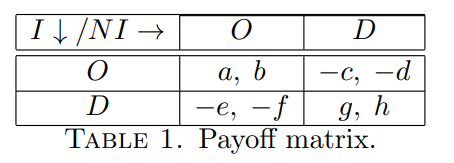

With the corresponding system of ODEs:

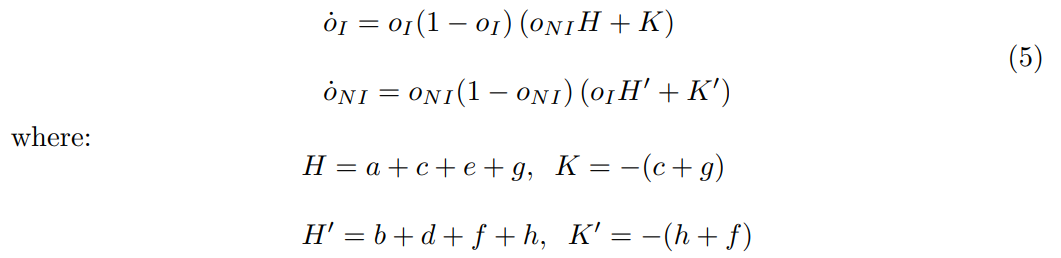


We start by plotting the vector field of the system of ODEs with all parameters equal to 1

In [7]:
# SETTING PAYOFF MATRIX VALS (P.16):
a=1
b=1
c=1
d=1
e=1
f=1
g=1
h=1

# SETTING CONSTANTS (P.19):
H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f


In [8]:
# SETTING RATIOS:
nr_OI=10
nr_DI=10

nr_ONI=10
nr_DNI=10

nr_I = nr_OI + nr_DI
nr_NI = nr_ONI + nr_DNI

pop_tot = nr_I + nr_NI

# SETTING DISTRIBUTIONS (P.16):
o_i= nr_OI/ nr_I
d_i= nr_DI/ nr_I
o_ni= nr_ONI/nr_NI
d_ni= nr_DNI/nr_NI

# SETTING EXPECTATIONS (P.17):
exp_o_i = a*o_ni - c*(1-o_ni)
exp_d_i = -e*o_ni + g*(1-o_ni)
exp_o_ni = b*o_i - f*(1-o_i)
exp_d_ni = -d*o_i + h*(1-o_i)

In [9]:
# SETTING SYSTEM EQUATIONS (P.19):
def f_rumor(x,y):
    return (x*(1-x)*(y*H1 + K1), y*(1-y)*(x*H2 + K2))

Text(0.5, 1.0, 'Vector field for rumor spreading')

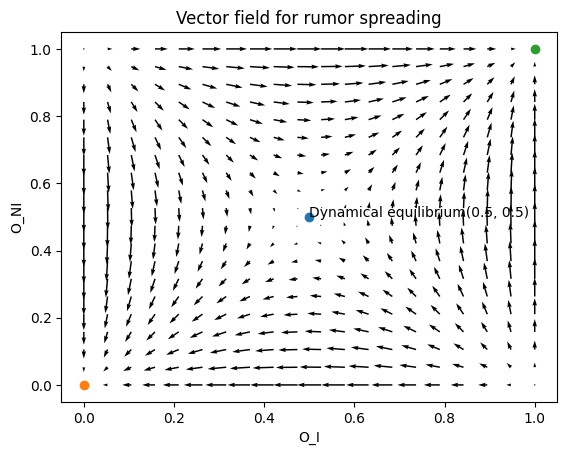

In [10]:
# TESTING TO COMPARE WITH RESULTS FROM PAPER.
x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 20)

X, Y = np.meshgrid(x, y)
U, V = f_rumor(X,Y)

plt.quiver(X, Y, U, V)

plt.plot(-K2/H2,-K1/H1, 'o')
plt.plot(0,0, 'o')
plt.plot(1,1, 'o')
plt.text(-K2/H2,-K1/H1,'Dynamical equilibrium' +str((-K2/H2,-K1/H1)))

plt.xlabel('O_I')
plt.ylabel('O_NI')
plt.title("Vector field for rumor spreading")

We consider the first integral 

$$
  C(x,y) :=(-K2-H2)\ln(1-X) + K2\ln(X) + (K1+H1)\ln(1-Y) - K1\ln(Y)
  $$
  
 which is locally constant on any solution of (5).

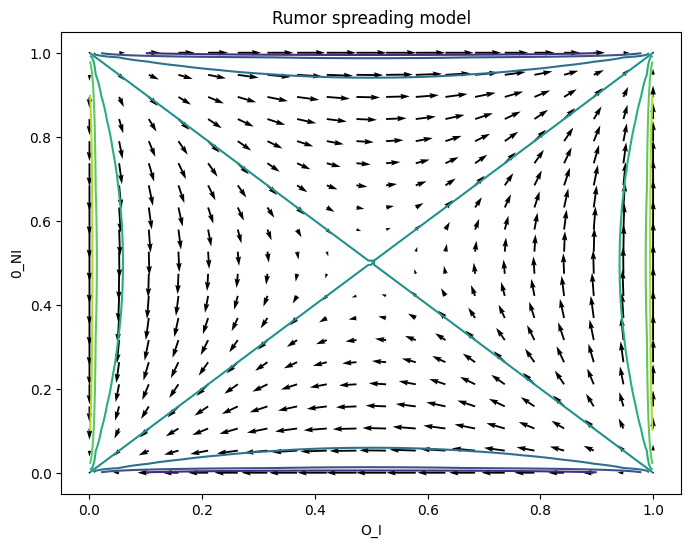

In [11]:
x = np.linspace(0.001, .999, 100)    # STARTING NOT AT 0, AND ENDING NOT AT 1 SO TAKING LOG DOESN'T EXPLODE
y = np.linspace(0.001, .999, 100)
x2=np.linspace(0, 1, 20)
y2=np.linspace(0, 1, 20)

X2, Y2 = np.meshgrid(x2, y2)
X, Y = np.meshgrid(x, y)
U, V = f_rumor(X2,Y2)


plt.figure(figsize = (8, 6))


plt.quiver(X2, Y2, U, V)
C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)
plt.contour(X, Y, C)


plt.xlabel('O_I')
plt.ylabel('0_NI')
plt.title("Rumor spreading model")
plt.show()

## Testing different parameter values

Performing a brief analysis on how to modify the parameters so they yeild interesting behaviour:

So far we have seen that the result under the radical $\lambda = \pm \sqrt{\frac{K_{2}K_{1}}{H_{1}H_{2}}(K_{2}+H_{2})(K_{1}+H_{1})}$ is always positive. However, what would it take to make them negative? 

If we substitute varibales $K_{1}$, $H_{1}$, $K_{2}$, and $H_{2}$ for their definition we get:

\begin{equation}
    \begin{split}
        \lambda &= \sqrt{\frac{[-(h+f)][-(c+g)]}{(a+c+e+g)(b+d+f+h)}[[-(h+f)]+(b+d+f+h)][[-(c+g)]+(a+c+e+g)]}\\
        &= \sqrt{\frac{(h+f)(g+c)(a+e)(b+d)}{(a+c+e+g)(b+d+f+h)}}
    \end{split}
\end{equation}

Now recall that the dynamical equilibrum was found to be: 

$$\left(-\frac{-(h+f)}{b+d+f+h}, -\frac{-(c+g)}{a+c+e+g}\right)$$

From where we conclude that making either $(g+c)$ or $(h+f)$ negative is not a good idea since that would make the dynamical equilibrium be in the negative quadrants (i.e: not in the [1,1] square). So we will focus ion making either $(a+e)$ or $(b+d)$ negative (or both).

Case 1:
We need: 
\begin{align}
    a+e &< 0 & a+e &< c+g 
\end{align}
And furthermore we need to make sure that $a+c+e+g \neq 0$.


Case 2:
We need 
\begin{align}
    b+d &< 0 & b+d &< f+h
\end{align}
And furthermore we need to make sure that $b+d+f+h \neq 0$.


Case 3:
Both Case 1 and Case 2 simultaneously.

In [12]:
# SETTING PARAMETERS ACCORDING TO ALGEBRAIC ANALYSIS:

def caseSwitchForPayoff(case_number):
    # THIS FUNCTION CHANGES THE PARAMETERS SUCH THAT THEY MATCH THE SPECIFIED
    # CASE FROM THE ALGEBRAIC ANALYSIS.
    if case_number == 1:
    # FOR CASE 1 WE HAVE: a+e < 0 AND a+e < c+g
        a=0.001
        b=1
        c=10
        d=1
        e=-0.002
        f=1
        g=10
        h=1
    elif case_number == 2:
    # FOR CASE 2 WE HAVE: b+d < 0 AND b+d < f+h
        a=1
        b=0.001
        c=1
        d=-0.002
        e=1
        f=10
        g=1
        h=10
    elif case_number == 3:
    # COASE 3 COMBINED BOTH CASE 1 AND CASE 2
        a=0.001
        b=0.001
        c=10
        d=-0.002
        e=-0.002
        f=10
        g=10
        h=10
    return a, b, c, d, e, f, g, h
        

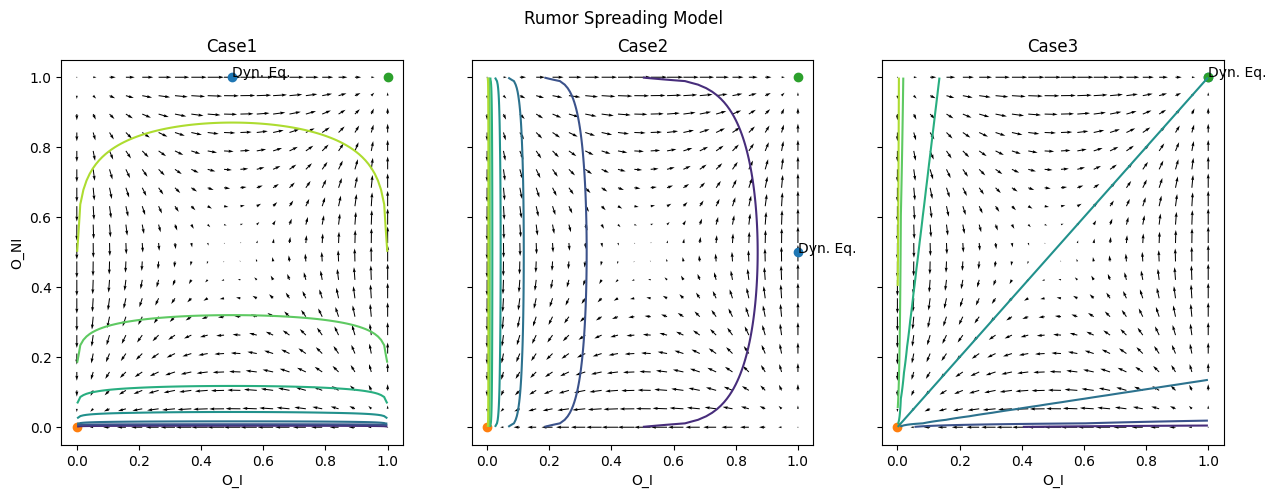

In [13]:
x_test = np.linspace(0, 1, 20)
y_test = np.linspace(0, 1, 20)
x_test2=np.linspace(0, 1, 20)
y_test2=np.linspace(0, 1, 20)

X_test, Y_test = np.meshgrid(x_test, y_test)
X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
U_test, V_test = f_rumor(X_test,Y_test)

fig, axs = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Rumor Spreading Model')

for idx in range(3):
    a, b, c, d, e, f, g, h = caseSwitchForPayoff(idx+1) 
    H1= a+c+e+g
    H2= b+d+f+h
    K1= -c-g
    K2= -h-f
    axs[idx].quiver(X_test, Y_test, U_test, V_test)
    axs[idx].plot(-K2/H2,-K1/H1, 'o')
    axs[idx].plot(0,0, 'o')
    axs[idx].plot(1,1, 'o')
    axs[idx].text(-K2/H2,-K1/H1, 'Dyn. Eq.')
    C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)
    axs[idx].contour(X, Y, C)
    axs[idx].set_title('Case' + str(idx+1))
    axs[idx].set(xlabel='O_I', ylabel='O_NI')
    axs[idx].label_outer()
    

## Analysis

In order for the Dynamical Equilibrium to be within the [1,1] square we needed to make $c+g$ larger than $a+e$ so that $\frac{-(c+g)}{a+c+e+g}$ tends to 1. Unfortunately, the value only tends to 1 but is not actually 1. So, technically speaking the computed Dynamical Eq. is not really within [1,1]. This seems to be in accordance with the fact that the Dynamical Equilibrium for cases 1 and 2, seems to be in the middle of the vector field instead of being in a point of convergence. Only the Dynamical Equilirbium for Case 3 seems to make sense.